In [18]:
##### PUNTO 1 #####

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


"""
Al importar "from keras.utils import np_utils" me sucede algo muy particular y es que la primera vez
que ejecuto la celda no funciona, pero la segunda vez si.

Además, a partir de la tarea 6 utilicé Jupyter Notebook ya que tenía problemas para ejecutar algunas cosas
en el Colab
"""

'\nAl importar "from keras.utils import np_utils" me sucede algo muy particular y es que la primera vez\nque ejecuto la celda no funciona, pero la segunda vez si.\n\nAdemás, a partir de la tarea 6 utilicé Jupyter Notebook ya que tenía problemas para ejecutar algunas cosas\nen el Colab\n'

In [19]:
##### PUNTO 2 #####

(X_train, y_train), (X_test, y_test) = mnist.load_data()

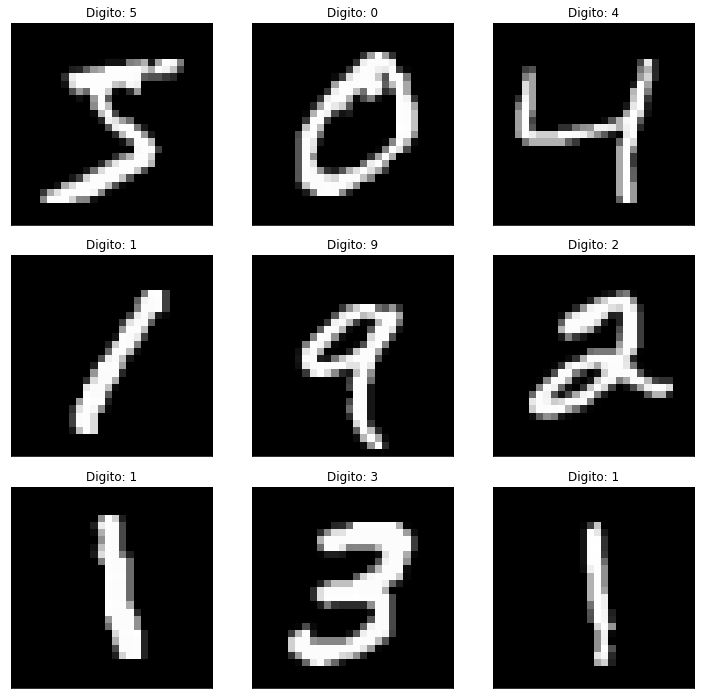

In [20]:
##### PUNTO 3 #####

fig = plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digito: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Distribución de valores de píxeles')

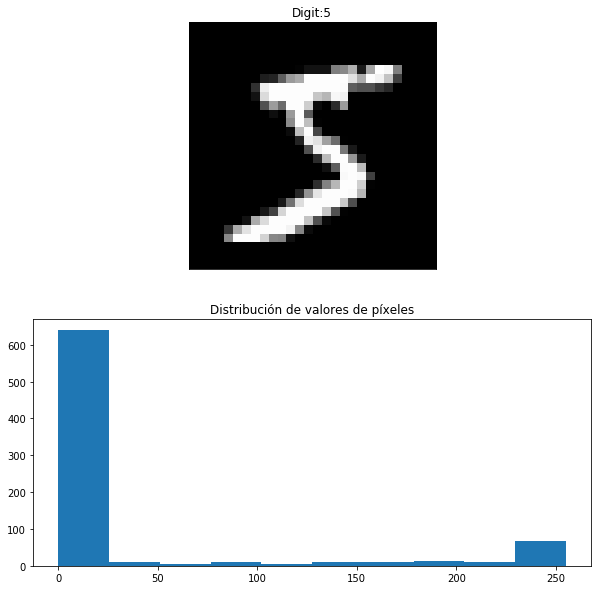

In [21]:
##### PUNTO 4 #####

fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit:{}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Distribución de valores de píxeles")

In [22]:
##### PUNTO 5 #####

# Veamos las dimensiones de los datos antes de realizar el reshape y la normalización

print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [23]:
# Construcción del vector de entrada a partir de las imágnes de 28x28

X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [24]:
# Normalizacion de los datos para facilitar el entrenamiento

X_train /= 255
X_test /= 255

In [25]:
# Impresión del las dimensiones del vector de entrada para el entrenamiento y evaluación

print("Tamaño de la Matriz de entrenamiento",X_train.shape)
print("Tamaño de la Matriz de evaluación",X_test.shape)

Tamaño de la Matriz de entrenamiento (60000, 784)
Tamaño de la Matriz de evaluación (10000, 784)


In [26]:
##### PUNTO 6 #####

print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [27]:
##### PUNTO 7 #####

# One-hot encoding usando las utilidades de numpy de keras.

n_clases = 10
print("Dimensiones antes de aplicar one-hot encoding",y_train.shape)
y_train = np_utils.to_categorical(y_train, n_clases)
y_test = np_utils.to_categorical(y_test, n_clases)
print("Dimensiones antes de aplicar one-hot encoding",y_train.shape)

Dimensiones antes de aplicar one-hot encoding (60000,)
Dimensiones antes de aplicar one-hot encoding (60000, 10)


In [28]:
##### PUNTO 8 #####

# Capas del modelo secuencial

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [29]:
##### PUNTO 9 #####

# Compilando el modelo secuencial

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
optimizer='adam')

In [30]:
##### PUNTO 10 #####

# entrenar el modelo y guardar métricas

history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=2, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 12s - loss: 0.2475 - acc: 0.9255 - val_loss: 0.1055 - val_acc: 0.9668
Epoch 2/20
 - 12s - loss: 0.1011 - acc: 0.9687 - val_loss: 0.0859 - val_acc: 0.9711
Epoch 3/20
 - 12s - loss: 0.0713 - acc: 0.9775 - val_loss: 0.0724 - val_acc: 0.9758
Epoch 4/20
 - 12s - loss: 0.0555 - acc: 0.9829 - val_loss: 0.0690 - val_acc: 0.9771
Epoch 5/20
 - 12s - loss: 0.0467 - acc: 0.9847 - val_loss: 0.0698 - val_acc: 0.9783
Epoch 6/20
 - 12s - loss: 0.0388 - acc: 0.9872 - val_loss: 0.0723 - val_acc: 0.9797
Epoch 7/20
 - 12s - loss: 0.0335 - acc: 0.9890 - val_loss: 0.0801 - val_acc: 0.9786
Epoch 8/20
 - 12s - loss: 0.0290 - acc: 0.9898 - val_loss: 0.0658 - val_acc: 0.9825
Epoch 9/20
 - 12s - loss: 0.0284 - acc: 0.9901 - val_loss: 0.0741 - val_acc: 0.9806
Epoch 10/20
 - 12s - loss: 0.0289 - acc: 0.9906 - val_loss: 0.0622 - val_acc: 0.9844
Epoch 11/20
 - 12s - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0701 - val_acc: 0.9821
Epoch 12/20
 - 12s - los

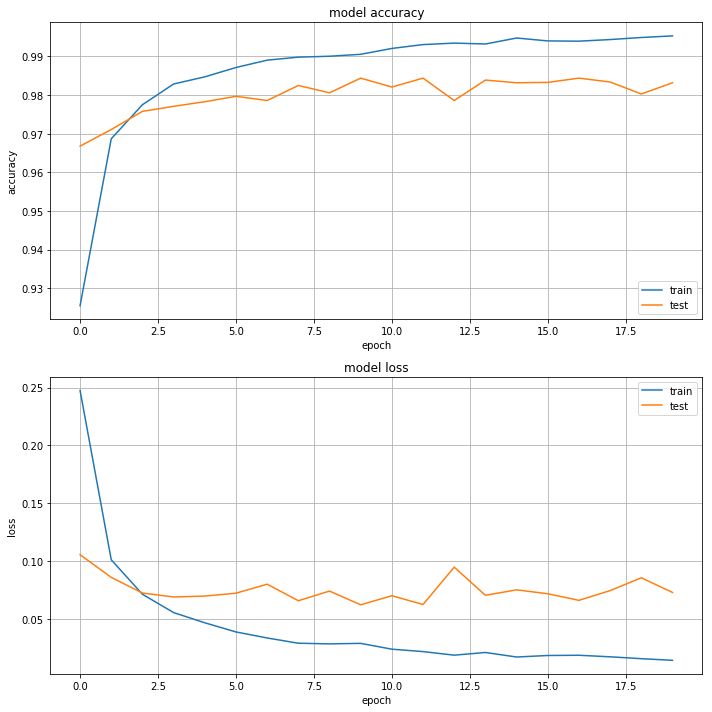

In [31]:
##### PUNTO 11 #####

# Graficas de las métricas

fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()